# 获得前N个主成分

In [7]:
import numpy as np
import matplotlib.pyplot as plt 

In [8]:
x = np.empty((100,2))
x[:,0] = np.random.uniform(0.,100.,size = 100)
x[:,1] = 0.75*x[:,0] + 3. + np.random.normal(0,10.,size=100)

In [9]:
def demean(x):
    return x-np.mean(x,axis=0)
x_demean = demean(x)

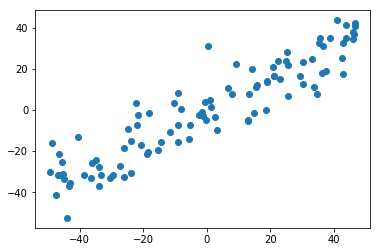

In [10]:
plt.scatter(x_demean[:,0],x_demean[:,1])
plt.show()

In [24]:
def f(w,x):
    return np.sum((x.dot(w))**2)/len(x)

def df(w,x):
    return x.T.dot(x.dot(w)) * 2 /len(x)

def direction(w):
    return w/np.linalg.norm(w)###  w/(w的模)

def first_component(x , initial_w , eta, n_iters=1e4, epsilson = 1e-8):
    i_iter=0
    w = direction(initial_w)
    while i_iter<n_iters:
        gradient=df(w,x)
        last_w=w
        w=w+eta * gradient  ###迭代 让theta每次都能向导数的正移一步
        w = direction(w) ### 让w的模 为1，成为单位方向向量
        if(abs(f(w,x)-f(last_w,x))<epsilson):
              break
        i_iter+=1
    return w

In [25]:
initial_w = np.random.random(x.shape[1])   # 注意1：初始的开始的方向不能为零
eta = 0.01 # 注意2：不能使用standscaler进行标准化
w = first_comonent(x_demean,initial_w,eta)
w

array([0.78849319, 0.61504349])

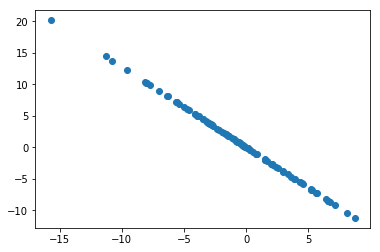

In [26]:
#x2 = np.empty(x.shape)
#for i in range(len(x)):
#     x2[i] = x[i] - x[i].dot(w) * w
x2 = x - x.dot(w).reshape(-1,1)*w
plt.scatter(x2[:,0],x2[:,1])
plt.show()

In [27]:
w2 = first_comonent(x2,initial_w,eta)
w2

array([ 0.61504655, -0.7884908 ])

In [28]:
w.dot(w2)

3.885453723317944e-06

In [29]:
def first_n_component(n, x, eta=0.01, n_iters=1e4, epsilson = 1e-8):
    x_pca = x.copy()
    x_pca = demean(x_pca)
    res = []
    for i in range(n):
        initial_w = np.random.random(x_pca.shape[1])   # 注意1：初始的开始的方向不能为零
        eta = 0.01 # 注意2：不能使用standscaler进行标准化
        w = first_comonent(x_pca,initial_w,eta) 
        res.append(w)
        
        x_pca = x_pca - x_pca.dot(w).reshape(-1,1) * w
        
    return res

In [30]:
first_n_component(2,x)

[array([0.7884931, 0.6150436]), array([-0.61503984,  0.78849603])]